In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import Lasso

# Import the train data

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

# Setup Pipeline

In [3]:
poly = PolynomialFeatures()
pca=PCA()
SLR = Lasso()

In [4]:
# Step 1: Polynomial transform
# Step 2: PCA
# Step 3: Model
pipe = Pipeline(steps=[("poly",poly),("pca",pca),("SLR",SLR)])

In [5]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "poly__degree":[1,2],
    "SLR__alpha":[0.05,0.1,0.2,0.5,1,2,8,10,100,1000,10000]
}

# Setup GridSearch

In [6]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [7]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('pca', PCA()), ('SLR', Lasso())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.05, 0.1, 0.2, 0.5, 1, 2, 8, 10, 100,
                                        1000, 10000],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170],
                         'poly__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [8]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.853):
{'SLR__alpha': 0.05, 'pca__n_components': 100, 'poly__degree': 1}


In [9]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,param_poly__degree,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
10,0.199625,0.021146,0.012925,0.008554,0.05,100,1,"{'SLR__alpha': 0.05, 'pca__n_components': 100,...",-0.775079,-0.808119,...,-0.925531,-1.012478,-0.712893,-0.745863,-0.841430,-0.872580,-0.887274,-0.853110,0.089978,1
12,0.125212,0.024416,0.012613,0.006882,0.05,150,1,"{'SLR__alpha': 0.05, 'pca__n_components': 150,...",-0.730444,-0.748982,...,-0.924766,-0.947118,-0.667845,-0.687494,-0.798476,-0.835862,-0.808362,-0.863896,0.226024,2
14,0.124357,0.013331,0.013434,0.004694,0.05,170,1,"{'SLR__alpha': 0.05, 'pca__n_components': 170,...",-0.730444,-0.748982,...,-0.924766,-0.947118,-0.667845,-0.687494,-0.798476,-0.835862,-0.808362,-0.863896,0.226024,2
8,0.191259,0.018142,0.011326,0.010631,0.05,60,1,"{'SLR__alpha': 0.05, 'pca__n_components': 60, ...",-0.800718,-0.817899,...,-0.948645,-1.017329,-0.719580,-0.764002,-0.853333,-0.871908,-0.895233,-0.865502,0.089034,4
6,0.149427,0.029588,0.010934,0.010002,0.05,45,1,"{'SLR__alpha': 0.05, 'pca__n_components': 45, ...",-0.805709,-0.841597,...,-0.954718,-1.038425,-0.740746,-0.756611,-0.874947,-0.902492,-0.955439,-0.886737,0.095748,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,5.938009,0.161822,0.129758,0.015632,0.05,10,2,"{'SLR__alpha': 0.05, 'pca__n_components': 10, ...",-1.331158,-1.278882,...,-1.683183,-1.611545,-1.134180,-1.393727,-1.348487,-1.382237,-1.425489,-1.396562,0.148019,172
19,5.791081,0.137068,0.147426,0.013066,0.1,10,2,"{'SLR__alpha': 0.1, 'pca__n_components': 10, '...",-1.331335,-1.278860,...,-1.683398,-1.612491,-1.134061,-1.393723,-1.348453,-1.382238,-1.424083,-1.396618,0.148176,173
35,5.858360,0.125668,0.131569,0.019126,0.2,10,2,"{'SLR__alpha': 0.2, 'pca__n_components': 10, '...",-1.331710,-1.278817,...,-1.683818,-1.614433,-1.133825,-1.393713,-1.348383,-1.382240,-1.421322,-1.396746,0.148503,174
67,5.827255,0.097570,0.131128,0.020906,1,10,2,"{'SLR__alpha': 1, 'pca__n_components': 10, 'po...",-1.334570,-1.278495,...,-1.687062,-1.624947,-1.131873,-1.393673,-1.347939,-1.382259,-1.400748,-1.396882,0.150689,175


# Best Hyperparameter

In [10]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 0.05, 'pca__n_components': 100, 'poly__degree': 1}


# # Evaluate Model $log(Sales)$

In [11]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_degree=parms.iloc[0][0]['poly__degree']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [12]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)

In [13]:
poly1 = PolynomialFeatures(degree=best_degree)

In [14]:
pca1 = PCA(n_components=100)
X_train1 = poly1.fit_transform(X_train1)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Lasso(alpha=best_alpha)
SLR1.fit(PX_train1,Y_train1)

Lasso(alpha=0.05)

In [15]:
pca2 = PCA(n_components=100)
X_test1=poly1.fit_transform(X_test1)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [16]:
MSE(SLR1.predict(PX_test1),Y_test1)

1.8526117820261607

In [17]:
result = pd.DataFrame(np.exp(Y_test1))

In [18]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [19]:
MSE(result["sales"],result["Predicted_sales"])

1086.1813935222935

# Inventory Decision

In [20]:
residue = result['sales']-result['Predicted_sales']

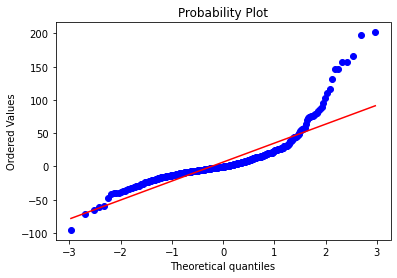

In [21]:
import scipy
scipy.stats.probplot(residue, dist="norm", plot=plt)
plt.show()

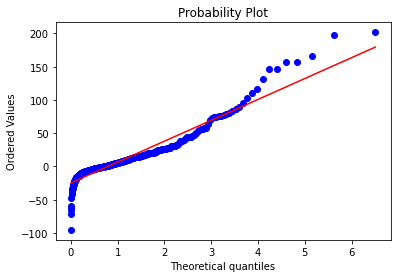

In [22]:
scipy.stats.probplot(residue, dist="expon", plot=plt)
plt.show()

In [23]:
import scipy.stats as sct

In [24]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

In [25]:
s = residue.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

In [26]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

# Out-of-samples Profit

In [27]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [28]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [29]:
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

24788.0

In [30]:
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

23880.0